[*********************100%%**********************]  1 of 1 completed
/Users/ashishlama/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


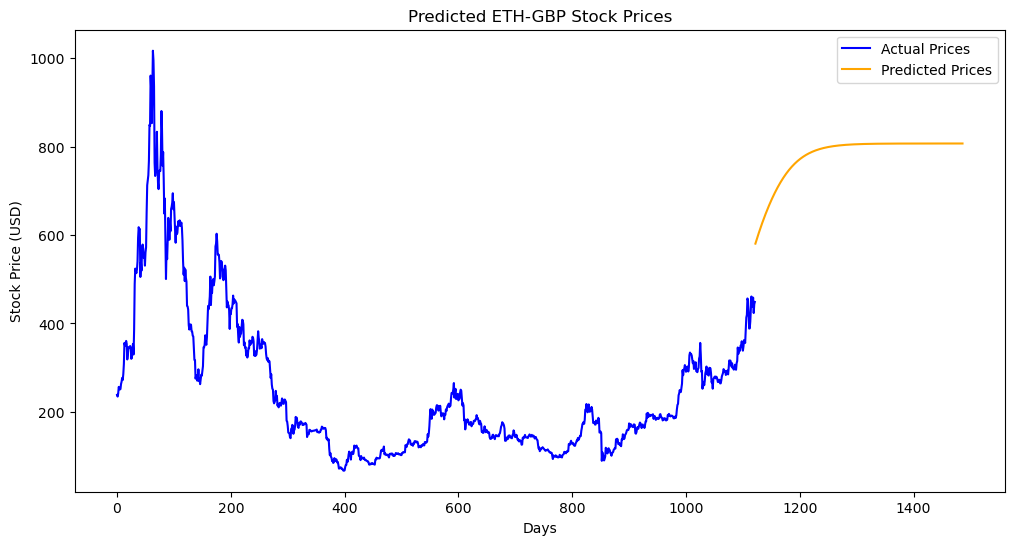

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# Define the stock ticker symbol (e.g., 'AAPL' for Apple)
ticker_symbol = 'ETH-GBP'

# Fetch historical data using Yahoo Finance
df = yf.download(ticker_symbol, start='2012-01-01', end='2020-12-07')

# Extract the closing price (you can choose other features as well)
closing_prices = df['Close'].values.reshape(-1, 1)

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(closing_prices)

# Split data into training and testing sets
train_size = int(0.8 * len(scaled_prices))
train_data, test_data = scaled_prices[:train_size], scaled_prices[train_size:]

# Prepare input features (X) and target labels (y) for training
X_train, y_train = train_data[:-1], train_data[1:]

# Initialize and train the SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)

# Predict future stock prices (e.g., next 6 months, 30 days/month)
future_days = 365
last_known_price = closing_prices[-1]
predicted_prices = [last_known_price]

for _ in range(future_days):
    next_day_price = svr_rbf.predict(predicted_prices[-1].reshape(1, -1))
    predicted_prices.append(next_day_price)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.title(f"Predicted {ticker_symbol} Stock Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.plot(range(len(closing_prices)), closing_prices, label="Actual Prices", color='blue')
plt.plot(range(len(closing_prices), len(closing_prices) + future_days), predicted_prices[1:], label="Predicted Prices", color='orange')
plt.legend()
plt.show()
